## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import struct

## Determination of a fitness function

In [2]:
def func(y):
    return np.round(y + np.abs(np.sin(32*y)),4)

### Vizualizing the fitness function

In [3]:
vec = np.linspace(0,np.pi,1000)

Text(0, 0.5, 'f(y)')

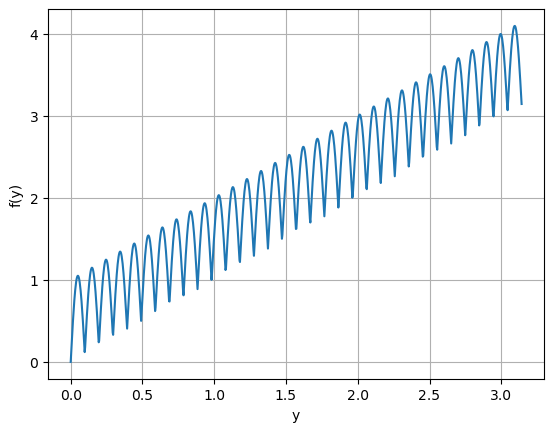

In [4]:
plt.plot(vec,func(vec))
plt.grid()
plt.xlabel('y')
plt.ylabel('f(y)')

## Functions for the convertion of float to bits and vice-versa

In [5]:
L = 4*8

In [6]:
def floatToBits (f):
    s = struct.pack ('>f', f)
    return struct.unpack ('>L', s)[0]

def bitsToFloat (b):
    s = struct.pack ('>L', b)
    return struct.unpack ('>f', s)[0]

def get_bits (x):
    x = floatToBits (x)
    N = 4 * 8
    bits = ''
    for bit in range (N):
        b = x & (2**bit)
        bits += '1' if b > 0 else '0'
    return bits

get_bits_vec = np.vectorize(get_bits)

def get_float(bits):
    x = 0
    assert(len(bits) == L)
    for i, bit in enumerate(bits):
        bit = int(bit)
        x+= bit*(2**i)
    return bitsToFloat(x)

get_float_vec = np.vectorize(get_float)

## Crossover

### Single Crossover

In [9]:
def cruz_unico(P1,P2,a):
    F1 = P1[:a] + P2[a:]
    F2 = P2[:a] + P1[a:]
    return F1, F2

### Double Crossover

In [10]:
def cruz_mult(P1,P2,A):
    for i in A:
        F1,F2 = cruz_unico(P1,P2,i)
    return F1, F2

## Mutation

In [11]:
def Mutation(Vec,MU_rate):
    for i,j in enumerate(Vec):
        if np.random.rand() < MU_rate and i != 31:
            if Vec[i] == '0':
                Vec  = Vec[:i] + '1' + Vec[i+1:]
            else:
                Vec  = Vec[:i] + '0' + Vec[i+1:]
    return Vec

### Implementation

In [12]:
def GA(max_gen, pop_size, CO_rate, MU_rate,plot_gen = []):
    gen = 0
    mean_perf = []
    pop = np.random.rand(pop_size)*np.pi



    while gen < max_gen:
        if gen in (plot_gen):
            print('Geração de Número ' + str(gen))
            plt.figure()
            plt.plot(vec,func(vec))
            plt.plot(pop,func(pop),'o')
            plt.grid()
            plt.xlabel('y')
            plt.ylabel('f(y)')
            plt.show()
        
        Data = pd.DataFrame(data = np.array([pop, get_bits_vec(pop),func(pop)]).T,
                        columns = ['Float','Binary', 'Performance']
                       ).sort_values(['Performance'], ascending = False)

        Parents = Data.iloc[:int(len(Data)/2),:]
        Children = []
        Crossover = Parents
        while  len(Crossover) > 1:
            Par = Crossover.sample(n=2)
            
            if np.random.rand() > CO_rate:
                x = [np.random.randint(1,31) for p in range(0,2)]
                x.sort(reverse=False)
                Child = list(cruz_mult(Par['Binary'].values[0],Par['Binary'].values[1],x))
                Child_Mut = [Mutation(Child[0],MU_rate),Mutation(Child[1],MU_rate)]
                Children = Children + Child_Mut    
                Crossover = Crossover.drop(Par.index)
            else:
                Children = Children + [Par['Binary'].values[0],Par['Binary'].values[0]]
                Crossover = Crossover.drop(Par.index)

        
        pop = get_float_vec(list(Parents['Binary'].values) + Children)
        for i,j in enumerate(pop):
            if j < np.pi:
                pass
            else:
                pop[i] = np.random.rand()*np.pi

        mean_perf.append(func(pop).mean())
        gen = gen + 1

    return mean_perf

## Case 1

In [13]:
gen_b = 300
pop_b = 100
cro_b = 0.3
mut_b = 10**-3

Geração de Número 299


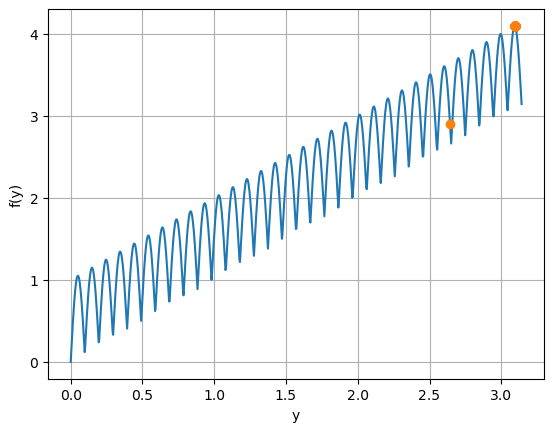

Text(0, 0.5, 'Mean Fitness')

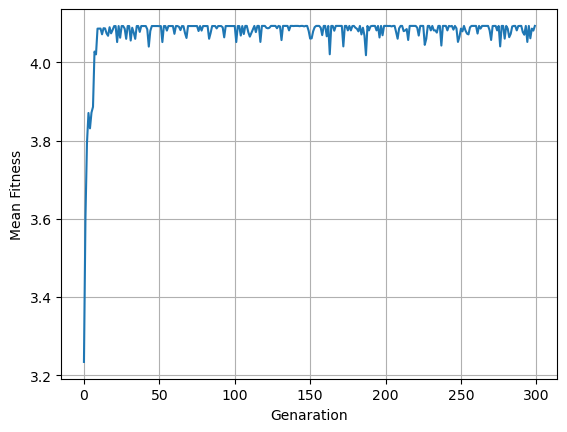

In [15]:
mean_perf = GA(gen_b, pop_b, cro_b, mut_b, [299])

plt.figure()
plt.plot(mean_perf)
plt.grid()
plt.xlabel('Genaration')
plt.ylabel('Mean Fitness')

## Evaluating the size of the population

In [16]:
mean_perf_4   = GA(gen_b, 4  , cro_b, mut_b)
mean_perf_10  = GA(gen_b, 10 , cro_b, mut_b)
mean_perf_25  = GA(gen_b, 25 , cro_b, mut_b)
mean_perf_50  = GA(gen_b, 50 , cro_b, mut_b)
mean_perf_100 = GA(gen_b, 100, cro_b, mut_b)
mean_perf_500 = GA(gen_b, 500, cro_b, mut_b)

Text(0, 0.5, 'Mean Fitness')

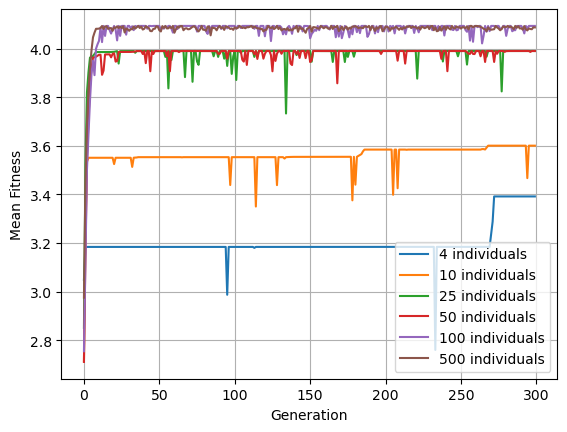

In [17]:
plt.figure()
plt.plot(mean_perf_4, label = '4 individuals')
plt.plot(mean_perf_10, label = '10 individuals')
plt.plot(mean_perf_25, label = '25 individuals')
plt.plot(mean_perf_50, label = '50 individuals')
plt.plot(mean_perf_100, label = '100 individuals')
plt.plot(mean_perf_500, label = '500 individuals')
plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')

## Evaluation of the number of generations

In [18]:
mean_perf_gen5    = GA(5  , pop_b, cro_b, mut_b)
mean_perf_gen10   = GA(10 , pop_b, cro_b, mut_b)
mean_perf_gen100  = GA(100 , pop_b, cro_b, mut_b)
mean_perf_gen300  = GA(300 , pop_b, cro_b, mut_b)
mean_perf_gen500  = GA(500 , pop_b, cro_b, mut_b)
mean_perf_gen1000 = GA(1000, pop_b, cro_b, mut_b)

Text(0, 0.5, 'Mean fitness')

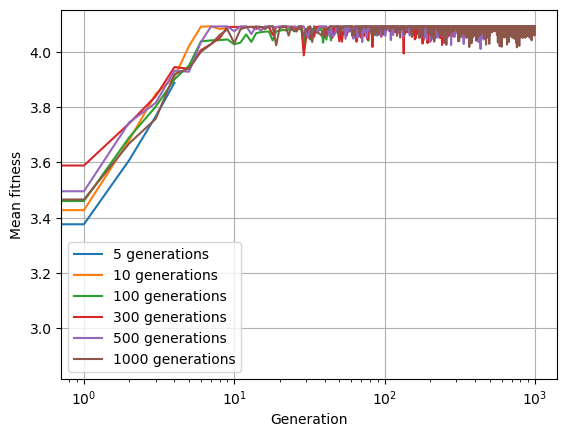

In [19]:
plt.figure()
plt.semilogx(mean_perf_gen5, label = '5 generations')
plt.semilogx(mean_perf_gen10, label = '10 generations')
plt.semilogx(mean_perf_gen100, label = '100 generations')
plt.semilogx(mean_perf_gen300, label = '300 generations')
plt.semilogx(mean_perf_gen500, label = '500 generations')
plt.semilogx(mean_perf_gen1000, label = '1000 generations')
plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.ylabel('Mean fitness')

## Evaluation of the crossover rate

In [20]:
mean_perf_cros10 = GA(gen_b, pop_b, 0.9, mut_b)
mean_perf_cros30 = GA(gen_b, pop_b, 0.7, mut_b)
mean_perf_cros50 = GA(gen_b, pop_b, 0.5, mut_b)
mean_perf_cros70 = GA(gen_b, pop_b, 0.3, mut_b)
mean_perf_cros90 = GA(gen_b, pop_b, 0.1, mut_b)

Text(0, 0.5, 'Mean fitness')

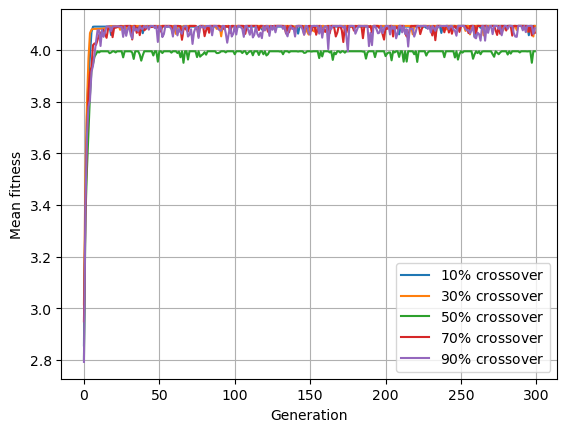

In [21]:
plt.figure()
plt.plot(mean_perf_cros10, label = '10$\%$ crossover')
plt.plot(mean_perf_cros30, label = '30$\%$ crossover')
plt.plot(mean_perf_cros50, label = '50$\%$ crossover')
plt.plot(mean_perf_cros70, label = '70$\%$ crossover')
plt.plot(mean_perf_cros90, label = '90$\%$ crossover')

plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.ylabel('Mean fitness')

## Evaluation of the mutation rate

In [22]:
mean_perf_mut1 = GA(gen_b, pop_b, cro_b, 10**-1)
mean_perf_mut2 = GA(gen_b, pop_b, cro_b, 10**-2)
mean_perf_mut3 = GA(gen_b, pop_b, cro_b, 10**-3)
mean_perf_mut4 = GA(gen_b, pop_b, cro_b, 10**-4)
mean_perf_mut5 = GA(gen_b, pop_b, cro_b, 10**-5)

Text(0, 0.5, 'Mean fitness')

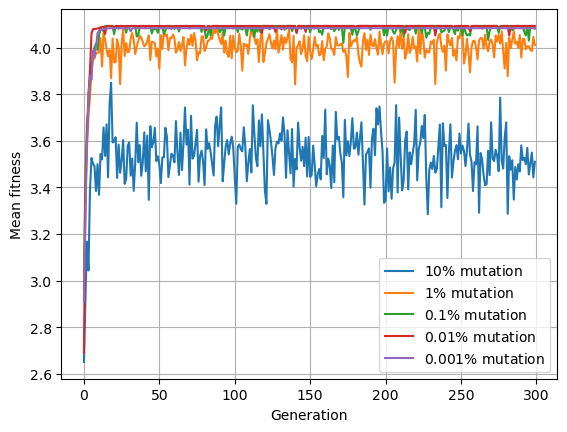

In [24]:
plt.figure()
plt.plot(mean_perf_mut1, label = '10$\%$ mutation')
plt.plot(mean_perf_mut2, label = '1$\%$ mutation')
plt.plot(mean_perf_mut3, label = '0.1$\%$ mutation')
plt.plot(mean_perf_mut4, label = '0.01$\%$ mutation')
plt.plot(mean_perf_mut5, label = '0.001$\%$ mutation')

plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.ylabel('Mean fitness')

### Fitness evolution

In [27]:
gen_b = 300
pop_b =100
cro_b = 0.3
mut_b = 10**-3

Geração de Número 0


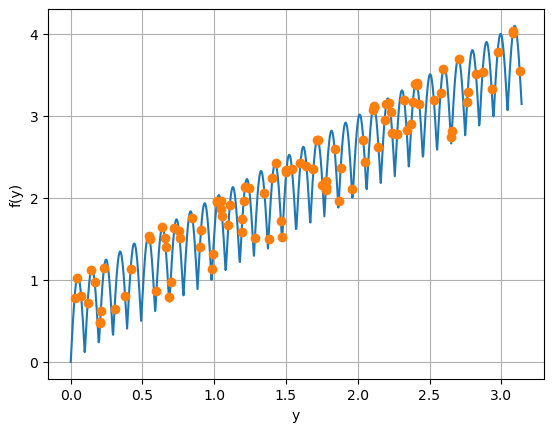

Geração de Número 1


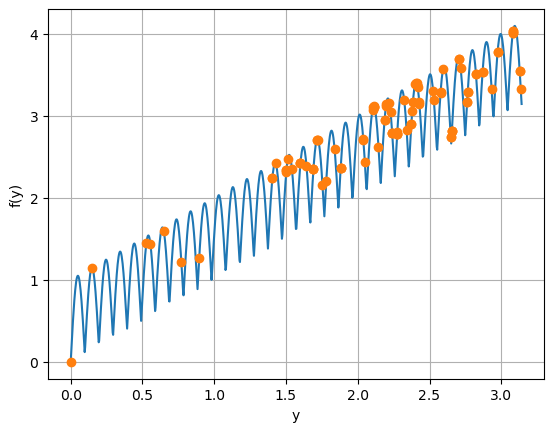

Geração de Número 5


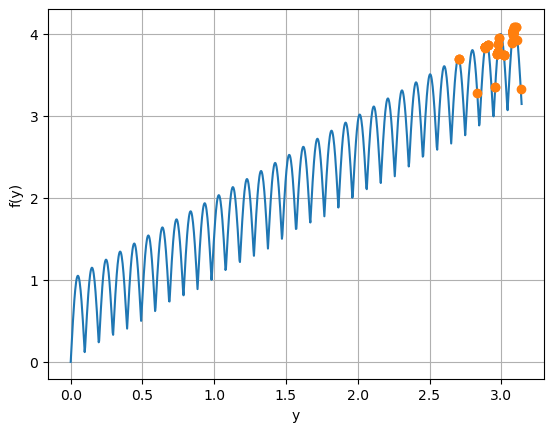

Geração de Número 299


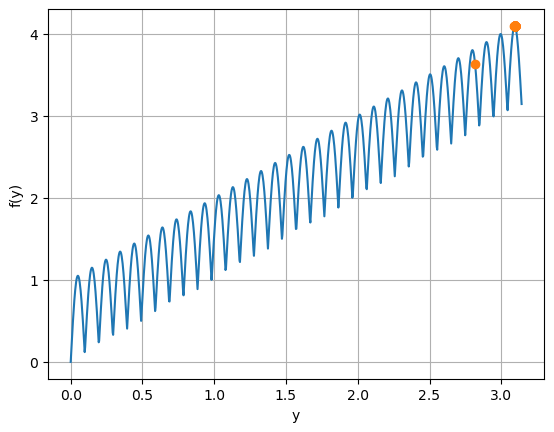

Text(0, 0.5, 'Mean Fitness')

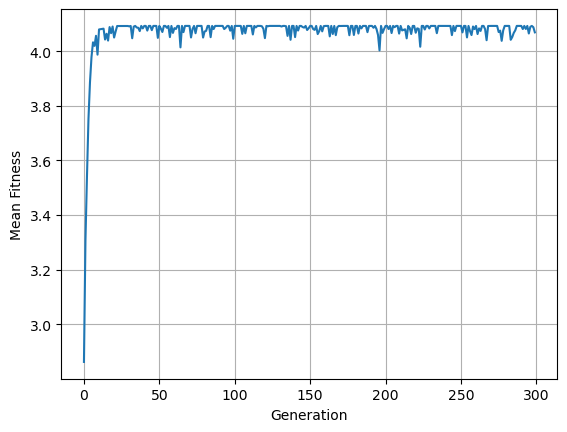

In [28]:
mean_perf = GA(gen_b, pop_b, cro_b, mut_b,plot_gen = [0,1,5,gen_b-1])

plt.figure()
plt.plot(mean_perf)
plt.grid()
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')